<a href="https://colab.research.google.com/github/singhuday26/hospital-management-system-/blob/main/Healthcare_Insurance_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSURANCE RISK PROCESSES (DATA VIZUALIZATIONS)

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
willianoliveiragibin_healthcare_insurance_path = kagglehub.dataset_download('willianoliveiragibin/healthcare-insurance')

print('Data source import complete.')


Data source import complete.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

### EDA
Commented out basic explorations to save space. Feel free to uncomment.

In [ ]:
raw_data = pd.read_csv("/kaggle/input/healthcare-insurance/insurance.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# raw_data.describe()  # basic summary stats.
# print(raw_data.isnull().sum())  # no null values

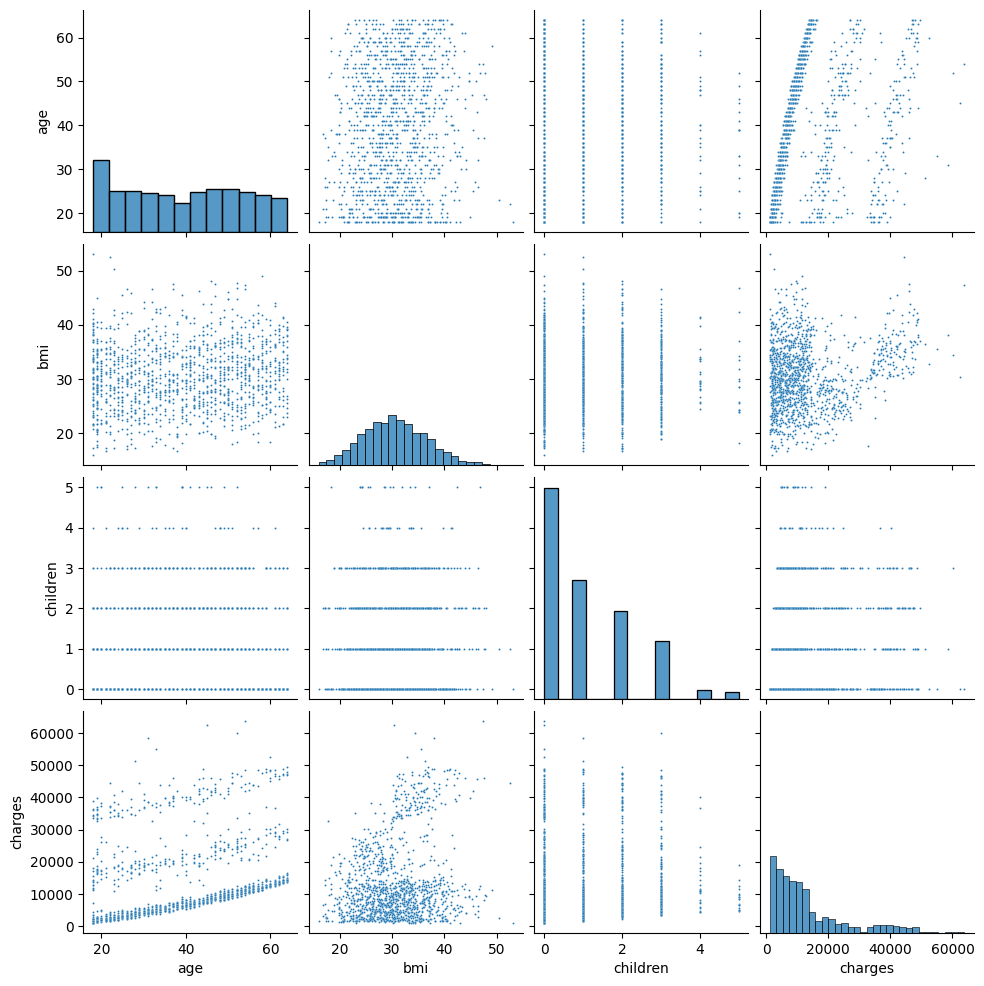

In [ ]:
sns.pairplot(raw_data, plot_kws = {'s': 2});

### Feature Engineering

<Axes: xlabel='age', ylabel='charges'>

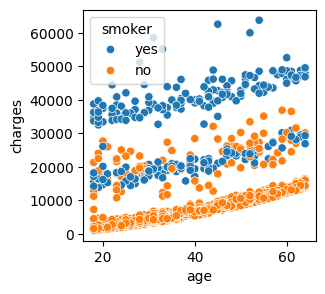

In [ ]:
_, ax = plt.subplots(1, 1, figsize = (3, 3))
sns.scatterplot(data = raw_data, x = "age", y = "charges", hue = "smoker", ax = ax)

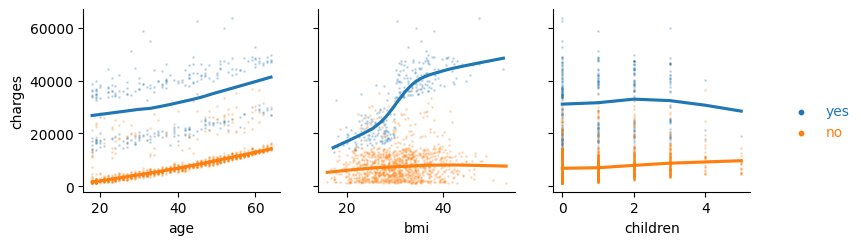

In [ ]:
# Rename the 'smoker' column to 'smoker_type'
raw_data = raw_data.rename(columns={'smoker': 'smoker_type'})

g = sns.PairGrid(raw_data, diag_sharey=False, hue = "smoker_type",
                x_vars = ["age", "bmi", "children"],
                y_vars = ["charges"],
                palette = sns.color_palette(n_colors = 3))
g.map(sns.regplot, lowess=True, scatter_kws={'alpha': 0.2, 's': 1})
g.add_legend();

# just cosmetics...
g.legend.set_title("")
for text, handle in zip(g.legend.get_texts(), g.legend.legend_handles):
    handle.set_alpha(1)
    handle.set_sizes([10])
    text.set_color(handle.get_facecolor()[0:3])

### Preparing Data for Modeling

In [ ]:
categorical_features = ["sex", "children", "smoker_type", "region"]
data = pd.get_dummies(data = raw_data, columns = categorical_features)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate

X = data.drop(columns = ["charges", "bmi"])
y = data.charges

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=42)

### Fitting and Evaluating Models

Now with some manually selected features.

In [ ]:
from sklearn.compose import ColumnTransformer

def get_feature_subset_selector(features):
    '''returns a ColumnTransformer that only selects the features specified by
    their names in `features`'''

    return ColumnTransformer(
        transformers=[('select features', 'passthrough', features)],
        remainder='drop'
    )

def OLS_model_with_subset_feature(all_features, selected_features):
    '''returns a sklearn.Pipeline object that does (1) selecting a
    subset of features (manually defined in `selected_features`), and
    (2) fit an OLS model with them.

    For one-hot encoded features using pd.get_dummies(): only need to
    include the original feature name (e.g. in this case "region" is enough,
    rather than "region_northwest", "region_southwest",...).'''

    pipe_name = f"Select{selected_features} -> LinearRegression()"

    selected_features = [possible_feature
                         for possible_feature in all_features
                         for selected_feature_name in selected_features
                         if possible_feature.startswith(selected_feature_name)]
    # filter all_features for the ones that appear in selected_features, including
    # the dummy/one-hot encoded ones derived from them.

    feature_selector = get_feature_subset_selector(selected_features)
    ols_pipeline = Pipeline([
        ('feature_selector', feature_selector),
        ('regressor', LinearRegression())
    ])

    return ols_pipeline, pipe_name

# two OLS models with only 2 and 3 features.
simple_OLS, simple_name = OLS_model_with_subset_feature(all_features=X_train.columns,
                                           selected_features=["bmi_splined", "age"])
less_simple_OLS, less_simple_name = OLS_model_with_subset_feature(all_features=X_train.columns,
                                           selected_features=["bmi_splined", "age", "region"])

<Axes: >

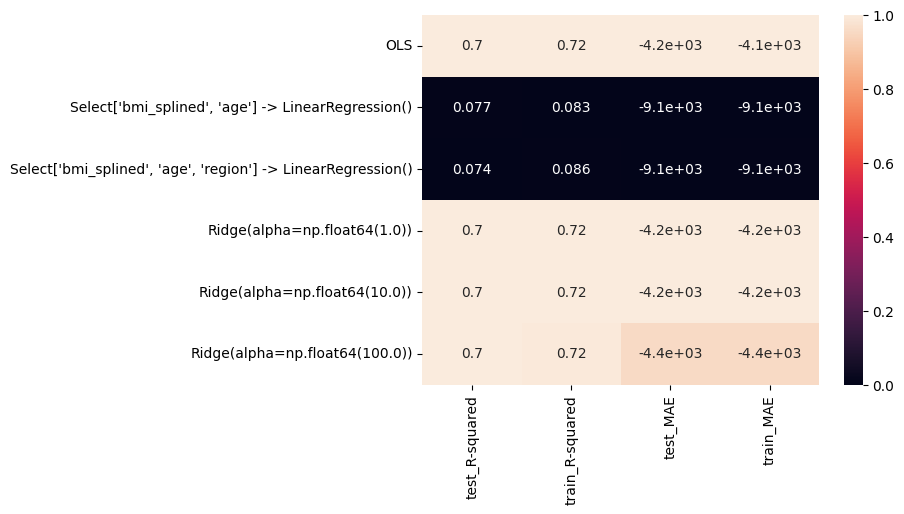

In [ ]:
plot_data = cv_result_df.apply(lambda col: (col - col.min()) / (col.max() - col.min()))
sns.heatmap(data = plot_data, annot=cv_result_df)

t-SNE usage

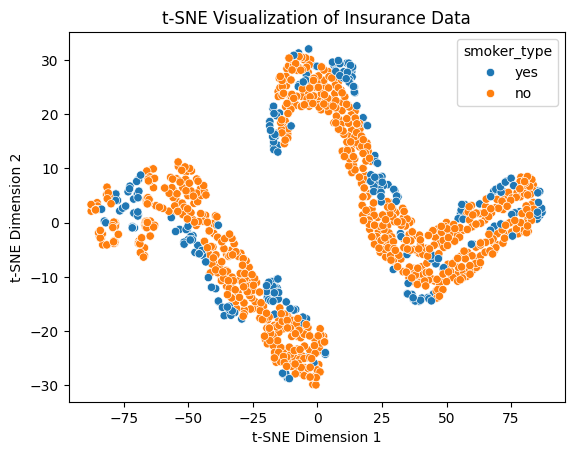

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) # You can adjust n_components and random_state
X_embedded = tsne.fit_transform(X) # X is your feature data

tsne_df = pd.DataFrame(X_embedded, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
tsne_df['smoker_type'] = raw_data['smoker_type'] # Assuming 'smoker_type' is a column of interest

sns.scatterplot(x='t-SNE Dimension 1', y='t-SNE Dimension 2', hue='smoker_type', data=tsne_df)
plt.title('t-SNE Visualization of Insurance Data')
plt.show()

### Evaluate on Test Set

In [ ]:
from sklearn.metrics import r2_score

model = models["Select['bmi_splined', 'age'] -> LinearRegression()"]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(r2_score(y_test, predictions))

0.10133866336919395


THANK YOU !